<center>
<img src="./images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material del libro Pattern Classification, Duda, Hardt and Stork.  Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import cauchy, norm

# IntML2020 - Teoria Bayesiana - Discriminantes y  Errores

# Ejercicio 1. 

En el caso de dos categorias, la regla de decision de Bayes el error condicional
 esta dada por la ecuacion (7)
 $$P(error|x)=\min [P (\omega_1 | x), P (\omega_2 | x)]$$. Incluso si las densidades a posteriori son continuas, esta forma de la
 condicional de errores casi siempre conduce a un integrando discontinuo en el calculo del error total en la ecuacion (5) $$P(error)=\int P(error|x)p(x) dx$$ .

* (a) Demostrar que para densidades arbitrarias, podemos obtener una cota superior para el error total usando en la ecuacion anterior $$P(error|x)=2P (\omega_1 | x) P (\omega_2 | x)$$.
* (b) Demostrar que si en la ecuacion (5), utilizamos $P (error | x) =\alpha P (\omega_1 | x) P (\omega_2 | x)$, con $\alpha<2$, entonces no podemos garantizar que la integral de una cota superior para el error.
* (c) Analogamente, demostrar que podemos utilizar $$P (error | x) = P (\omega_1 | x) P (\omega_2 | x)$$ y obtener una cota inferior para el error total.
* (d) Demostrar que si $P (error | x) =\beta P (\omega_1 | x) P (\omega_2 | x)$ con $\beta> 1$, entonces no podemos garantizar que la integral de una cota inferior para el error.




# *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

(a) La ecuacion (7) del texto es 

 $$P(error|x)=\min [P (\omega_1 | x), P (\omega_2 | x)]$$.  
 
 Asumamos que para un $x$ particular $P(\omega_2|x) \geq P(\omega_1|x)$, entonces 
 
 $$P(error|x)= P(\omega_1|x)$$
 
 La condicion de normalización para probabilidades dice que 
 
$$P (\omega_1 | x)+ P (\omega_2 | x)=1$$ 

por lo cual $ P (\omega_1 | x)=1 - P (\omega_2 | x)$.

Juntos esto implica que  $ 1-P (\omega_2 | x)\leq P (\omega_2 | x)$, por lo tanto  $ 2P (\omega_2 | x)\geq 1$ y 

$$2P (\omega_2 | x) P (\omega_1 | x)\geq  P (\omega_1 | x)=P(error|x)$$ 

Como esto ocurre para cada x, claramente las integrales cumplen 

$$\int 2P (\omega_2 | x) P (\omega_1 | x)p(x)dx \geq  \int P(error|x) p(x)dx$$ 


Abreviadamente, $2P (\omega_2 | x) P (\omega_1 | x)$ provee una cota superior para $P(error|x)$.

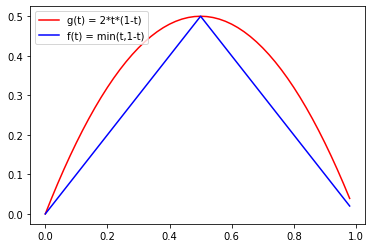

In [2]:
t = np.arange(0., 1., 0.02)
plt.plot(t, 2*t*(1-t), 'r', label = 'g(t) = 2*t*(1-t)')
plt.plot( t, (1-np.abs(2*t-1))/2, 'b', label = 'f(t) = min(t,1-t)')
plt.legend(loc='upper left')
plt.show()





(b) De la parte  (a), tenemos que $ P(\omega_2|x) > 1/2$, pero en las condiciones del inciso, no siempre resulta mayor que $1/\alpha$ para $\alpha  < 2$. Sea $\alpha = 4/3$ y $P(\omega_1|x)=0.4$, entonces 
$ P(\omega_2|x)=0.6$. En este caso  $P(error|x)=0.4$. Mas aun, se tiene

$$\alpha P(\omega_1|x)P(\omega_2|x)=4/3 × 0.6 × 0.4 < P(error|x)=0.4$$.


(c) En el caso de las cotas inferiores siempre vale que 

$$P(error|x) =\min [P (\omega_1 | x), P (\omega_2 | x)]\geq  P (\omega_1 | x) P (\omega_2 | x)$$

dado que $\max [P (\omega_1 | x), P (\omega_2 | x)]\leq 1$.

Luego,
$$\int P(\omega_1|x) P(\omega_2|x) p(x)\,dx \leq \int\min [P (\omega_1 | x), P (\omega_2 | x)] p(x)\,dx =\int P(error|x) p(x)dx$$

(d) mismo contraejemplo que en (b) funciona.

En este caso consideramos la función $h(t) = t*(1-t)$ en el intervalo $[0,1]$. Esta función acota inferiormente a $\min\{t,1-t\}$, como se puede ver en el siguiente gráfico:

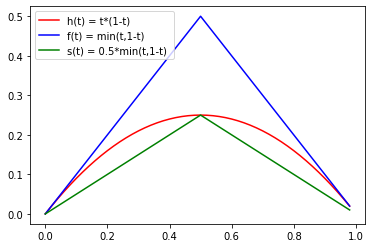

In [3]:
t = np.arange(0., 1., 0.02)
plt.plot(t, t*(1-t), 'r', label = 'h(t) = t*(1-t)')
plt.plot( t, (1-np.abs(2*t-1))/2, 'b', label = 'f(t) = min(t,1-t)')
plt.plot( t, (1-np.abs(2*t-1))/4, 'g', label = 's(t) = 0.5*min(t,1-t) ')
plt.legend(loc='upper left')
plt.show()

# Ejercicio 2. 

Suponga que se tienen dos variables independiente con igual funcion densidad
$$
p(x|\omega_i)\propto e^{(-|x-a_i|/b_i)}
$$
para $i=1,2$ and $0<b_i$.

* (a)  Escriba una expresion analitica para cada densidad, es decir normalize cada funcion para parametros $a_i, b_i$ arbitrarios, $b_i$ positivo.
* (b) Calcule el radio de verosimilitud como funcion de los parametros.
* (c) Graficar el radio $p(x|\omega_1)/p(x|\omega_2)$ para el caso $a_1=0$, $b_1=1$, $a_2=1$ y $b_2=2$.



# *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

(a) Esta es la distribución de Laplace 
$$
p(x|\omega_i)= \frac{1}{2b_i} e^{(-|x-a_i|/b_i)}
$$
para $i=1,2$ and $0<b_i$.

 Calculamos el valor de la integral $c = \int e^{(-|x-a_i|/b_i)}dx$. 
\begin{eqnarray}
\int_{-\infty}^\infty e^{(-|x-a_i|/b_i)}\,dx &=& \int_{-\infty}^{a_i} e^{(-(a_i-x)/b_i)}\,dx  + \int_{{a_i}}^\infty e^{(-(x-a_i)/b_i)}\,dx \\
&=& e^{-a_i/b_i} (b_i) \left( e^{a_i/b_i}-0\right) +  e^{a_i/b_i} (-b_i) \left( 0 - e^{-a_i/b_i}\right) \\
&=& {b_i} + {b_i} =  2b_i
\end{eqnarray}
Luego las densidades condicionales están dadas por:
$$p(x|\omega_i) = \frac1{2b_i} e^{(-|x-a_i|/b_i)}.$$





(b) El Radio de verosimilitud es  $$\frac{p(x|\omega_1)}{p(x|\omega_2)} =\frac{2b_2}{2b_1} e^{(-|x-a_1|/b_1)+|x-a_2|/b_2)} $$

(c) Para el caso $a_1=0$, $b_1=1$, $a_2=1$ y $b_2=2$ el radio de verosimilitud es 

$$\frac{p(x|\omega_1)}{p(x|\omega_2)} = \left\{
  \begin{array}{cc}
      2e^{(x+1)/2} & x\leq 0 \\
       2e^{(1-3x)/2} & 0\leq x\leq 1 \\
      2e^{(-1-x)/2} & 1\leq x
    \end{array}\right.
$$

##   <font color = 'green'>C)  RESPUESTA </font>

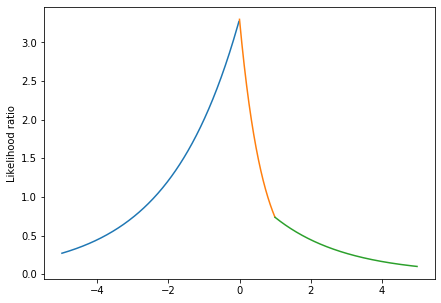

In [4]:
def likelihood_ratio_1(x):
    return 2*np.exp((1+x)/2)

def likelihood_ratio_2(x):
    return 2*np.exp((1-3*x)/2)

def likelihood_ratio_3(x):
    return 2*np.exp((-1-x)/2)

x_1 = np.linspace(-5, 0, 300, endpoint=False)
x_2 = np.linspace(0, 1, 300, endpoint=False)
x_3 = np.linspace(1, 5, 300)

plt.figure(figsize=(7,5))
plt.plot(x_1, likelihood_ratio_1(x_1))
plt.plot(x_2, likelihood_ratio_2(x_2))
plt.plot(x_3, likelihood_ratio_3(x_3))
plt.ylabel('Likelihood ratio');

# Ejercicio 3. 

Si las distribuciones condicionales para las dos categorias en el problema unidimensional son distribuciones de Cauchy
$$
p(x|\omega_i)=\frac{1}{\pi b}. \frac{1}{1+(\frac{x-a_i}{b})^2}
$$

* (a) Suponiendo que $P(\omega_1) = P(\omega_2)$, muestre que $P(\omega_1 | x) = P (\omega_2 | x)$ si $x =\frac{a_1 + a_2}{2}$, es decir, punto que da el mínimo  de la probabilidad de error en la decision es el punto medio entre los picos de las dos distribuciones, independientemente de $b$.
* (b)  Graficar $P(\omega_1|x)$ para el caso de $a_1=3$, $a_2=5$ y $b = 1$.
* (c)  ¿Como se comportan $P (\omega_1 | x)$ y $P (\omega_2 | x)$ cuando $x\rightarrow\infty$ y cuando $x\rightarrow-\infty$? Explicar.



# *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


(a) Tenemos que
$$P(\omega_1 | x)p(x) = p(x | \omega_1)P(\omega_1)$$
$$P(\omega_2 | x)p(x) = p(x | \omega_2)P(\omega_2)$$
Dado que $P(\omega_1) = P(\omega_2) = \frac 12$, podemos dividir miembro a miembro y resulta:
$$\frac{P(\omega_1|x)}{P(\omega_2|x)} = \frac{p(x | \omega_1)}{p(x | \omega_2)}.$$
La evaluación en $x_0 = \frac{a_1+a_2}2$ resulta:
$$\frac{P(\omega_1|\frac{a_1+a_2}2)}{P(\omega_2|\frac{a_1+a_2}2)} = \frac{1+\left(\frac{\frac{a_1+a_2}2-a_2}{b}\right)^2}{1+\left(\frac{\frac{a_1+a_2}2-a_1}{b}\right)^2} = 
\frac{1+\left(\frac{a_1-a_2}{2b}\right)^2}{1+\left(\frac{a_2-a_1}{2b}\right)^2} = 1$$
Luego $P(\omega_1|x_0) = P(\omega_2|x_0)$.

(b) Tenemos que:
$$p(x|\omega_1) = \frac 1\pi\frac{1}{1+(x-3)^2}, \qquad p(x|\omega_2) = \frac 1\pi\frac{1}{1+(x-5)^2}$$
Entonces:
$$P(\omega_1|x ) = \frac{p(x|\omega_1)P(\omega_1)}{p(x)} =  
\frac{p(x|\omega_1)P(\omega_1)}{p(x|\omega_1)P(\omega_1)+p(x|\omega_2)P(\omega_2)}=
\frac{\frac{1}{1+(x-3)^2}}{\frac{1}{1+(x-3)^2}+ \frac{1}{1+(x-5)^2}}
$$
Multiplicando numerador y denominador por $(1+(x-3)^2)(1+(x-5)^2)$ resulta:
$$P(\omega_1|x ) = \frac{1+(x-5)^2}{2+(x-3)^2+(x-5)^2}$$
Análogamente obtenemos:
$$P(\omega_2|x ) = \frac{1+(x-3)^2}{2+(x-3)^2+(x-5)^2}$$
Los gráficos pueden verse en la celda siguiente.




##   <font color = 'green'>B)  RESPUESTA </font>

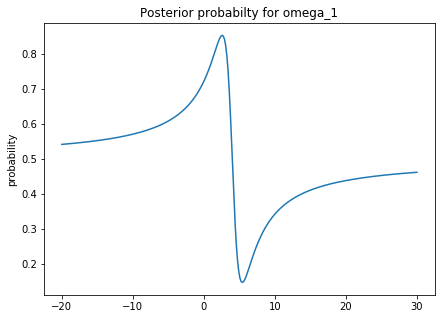

In [5]:
def posteriori_omega(x, a_1, a_2, b):
    likelihood = cauchy.pdf(x, loc=a_1, scale=b)
    evidence = 0.5*(cauchy.pdf(x, loc=a_1, scale=1) + cauchy.pdf(x, loc=a_2, scale=b))  
    priori = 0.5 
    return (likelihood*priori)/evidence

x = np.linspace(-20, 30, 300)
plt.figure(figsize=(7,5))
plt.plot(x, posteriori_omega(x, 3, 5, 1))
plt.title('Posterior probabilty for omega_1')
plt.ylabel('probability');

c) Substituyendo las densidades cauchy en la probabilidad a posteriori completa 

$$ \lim_{x\to \infty}P(\omega_1 | x)=\lim_{x\to \infty} \frac{ \frac{1}{2}\left[ \frac{1}{\pi b}. \frac{1}{1+(\frac{x-a_1}{b})^2}\right]} {\left[
\frac{1}{2} \left[\frac{1}{\pi b}. \frac{1}{1+(\frac{x-a_1}{b})^2}\right]+ \frac{1}{2}\left[\frac{1}{\pi b}. \frac{1}{1+(\frac{x-a_2}{b})^2} \right]
\right]} $$

$$=\lim_{x\to \infty}\frac{b^2+(x-a_i)^2 }{b^2+(x-a_1)^2+b^2+(x-a_2)^2}=\frac{1}{2}$$

De la misma forma $$ \lim_{x\to \infty}P(\omega_2 | x)=\frac{1}{2}$$


# Ejercicio 4. 

Si las distribuciones condicionales para las dos categorias en el problema unidimensional son distribuciones de Cauchy, y asuma la igualdad entre las probabilidades a priori para las categorias.

* (a) Demostrar que la probabilidad de error minimo esta dado por $$P (error) =\displaystyle\frac12-\displaystyle\frac{1}{\pi}\tan^{-1}\left|\displaystyle\frac{a_2-a_1}{2}\right|$$
* (b)  Graficar esto como una funcion de $\displaystyle\frac{a_2-a_1}{2}$.
* (c) ¿Cual es el maximo de $P(error)$ y en que condiciones ocurre esto? Explicar.


# *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

a) Sin pérdida de generalidad podemos asumir que $a_2>a_1$. 

Sabemos que $P(error) = \int P(error | x) p(x)dx$, por lo cual la probabilidad de error mínimo ocurre si se elige $P(error | x) = \min\{P(\omega_1 | x),\ P(\omega_2 | x)\}$.

También $P(\omega_1 | x) < P(\omega_2|x)$ si y sólo si $x>\frac{a_1+a_2}2$.


Por lo cual la región de decisión esta definida por el punto $x^*=\frac{a_1+a_2}{2}$  y la probabilidad del error es 
$$P(error) = \int_{-\infty}^{(a_1+a_2)/2} P(\omega_2|x)p(x)dx + \int_{(a_1+a_2)/2}^{\infty} P(\omega_1|x)p(x)dx$$
Asumiendo además $P(\omega_1)=P(\omega_2) = \frac 12$ tenemos que
$$P(\omega_i|x)p(x) = \frac 12 p(x|\omega_i).$$
Entonces resulta:
\begin{eqnarray}
\int_{-\infty}^{(a_1+a_2)/2} P(\omega_2|x)p(x)dx &=& \int_{-\infty}^{(a_1+a_2)/2} \frac{1}{2\pi b} \frac{1}{1+\left(\frac{x-a_2}b\right)^2} \,dx 
&=& \frac{1}{2\pi }\int_{-\infty}^{(a_1-a_2)/2b} \frac{1}{1+x^2}\,dx \\
&=& \frac{1}{2\pi}\left(\arctan\left(\frac{a_1-a_2}{2b}\right)-\frac{- \pi} 2\right)\\
\int_{(a_1+a_2)/2}^{\infty} P(\omega_2|x)p(x)dx
&=&  \int_{(a_1+a_2)/2}^{\infty} \frac{1}{2\pi b} \frac{1}{1+\left(\frac{x-a_1}2\right)^2} \,dx
\\
&=&\frac{1}{2\pi} \int_{\frac{a_2-a_1}{2b}}^\infty \frac{1}{1+x^2}\,dx
\\
&=& \frac{1}{2\pi }\left(\frac{\pi}2 - \arctan\left(\frac{a_2-a_1}{2b}\right)\right)
\end{eqnarray}

Luego la probabilidad de error mínimo está dado por:
$$P(error) = \frac{1}{2\pi }\left(\arctan\left(\frac{a_1-a_2}{2b}\right)+\frac \pi 2\right) + \frac{1}{2\pi}\left(\frac{\pi}2 - \arctan\left(\frac{a_2-a_1}{2b}\right)\right) = \frac 12 - \frac 1{\pi} \arctan\frac{a_2-a_1}{2b} =\frac 12 - \frac 1{\pi} \arctan\left|\frac{a_2-a_1}{2b}\right| $$




##   <font color = 'GREEN'>C)  RESPUESTA </font>

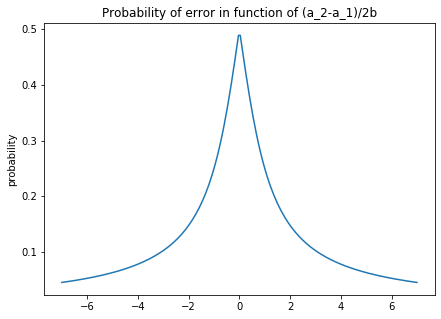

In [6]:
def prob_error(x):
    return 0.5-(1/np.pi)*np.arctan(abs(x))

x = np.linspace(-7, 7, 200)
plt.figure(figsize=(7,5))
plt.plot(x, prob_error(x))
plt.title('Probability of error in function of (a_2-a_1)/2b')
plt.ylabel('probability');

(c) El maximo valor de la probabilidad se da cuando $a_1=a_2$ o cuando $b=\infty$. 

# Ejercicio 5. 

Considere la siguiente regla de decisión para el problema de dos categorias unidimensional: Decido por $\omega_1$ si $x>\theta$; en otro caso decida por $\omega_2$.

* (a) Demuestre que la probabilidad de error para esta regla esta dada por 
$$P(error)=\int P(error|x)p(x) dx= P(\omega_1)\int_{-\infty}^\theta p(x|\omega_1) dx + P(\omega_2)\int^{\infty}_\theta p(x|\omega_2) dx $$

* (b) Derivando, demuestre que una condicion necesaria para minimizar el error es $$p(\theta|\omega_1)p(\omega_1)=p(\theta|\omega_2)p(\omega_2)$$

* (c) Define esta ecuación un $\theta$ unico?

* (d) De un ejemplo de un valor de $\theta$ en el que el error se maximice.

# *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

(a)  $P(\omega_i|x) = \frac{p(x|\omega_i)P(\omega_i)}{p(x)}$. 

Sabemos que 

i) si $x<\theta$ la decisión es $\omega_2$, por lo cual el error está dado por la probabilidad de elegir $\omega_1$ dado que $x<\theta$, $P(error,x<\theta )=\int_{-\infty}^\theta P(\omega_1|x)p(x)\,dx$

ii) Si $x>\theta$ la decisión es $\omega_1$, por lo cual el error está dado por la probabilidad de elegir $\omega_2$ dado que $x>\theta$, $P(error,x>\theta )=\int_\theta^{\infty} P(\omega_2|x)p(x)\,dx$

Entonces 
\begin{eqnarray}
P(error) &=& \int P(error|x)p(x)\,dx = \int_{-\infty}^\theta P(\omega_1|x)p(x)\,dx + 
\int_\theta^{\infty} P(\omega_2|x)p(x)\,dx \\
&=&  \int_{-\infty}^\theta \frac{p(x|\omega_1)P(\omega_1)}{p(x)}p(x)\,dx + 
\int_\theta^{\infty} \frac{p(x|\omega_2)P(\omega_2)}{p(x)}p(x)\,dx \\
&=& P(\omega_1)\int_{-\infty}^\theta p(x|\omega_1) \,dx + P(\omega_2) \int_\theta^{\infty} p(x|\omega_2)\,dx
\end{eqnarray}





(b)Quiero ver que 
$$p(\theta|\omega_1)p(\omega_1)=p(\theta|\omega_2)p(\omega_2)$$

Este resultado es cierto si $P(error)$ alcanza un mínimo local, lo cual ocurre cuando se alinean los astros, algo bastante seguido en estadística, pero ni por asomo genérico.

No se cumpliría si $P(error)$ fuese una función creciente o decreciente de $\theta$.
$$\lim_{\theta\to-\infty} P(error) = P(\omega_2), \qquad \lim_{\theta\to\infty} P(error) = P(\omega_1).$$

Dicho esto,  supongo que $P(error)$ alcanza un mínimo local por lo cual su valor mínimo debe ser alcanzado en un punto donde la derivada respecto de $\theta$ es $0$. 

Entonces, como $P(error)$ como una función de $\theta$ que toma valores en $[0,1]$, aplicando el Teorema fundamental de cálculo e igualando a cero:

$$\frac{d}{d\theta}P(error) = P(\omega_1) p(\theta|\omega_1) - P(\omega_2)p(\theta|\omega_2)=0$$

Luego el mínimo es alcanzado en un valor $\theta$ tal que

$$p(\theta|\omega_1) P(\omega_1)= p(\theta|\omega_2)P(\omega_2)$$

. Equivalentemente en un valor $\theta$ tal que las densidades conjuntas $p(\theta,\omega_1)$ y $p(\theta,\omega_2)$ son iguales.




(c) Con el mismo argumento, si $P(error)$ alcanza un máximo para algún valor de $\theta$ entonces también la derivada es $0$ y se tiene la misma condición. 


(d) Supongamos que la característica $X$ condicional a $\omega_i$ tiene distribución normal con media $\mu_i$ y desvío $\sigma_i$:
$$ X| \omega_i) \sim N(\mu_i, \sigma_i).$$
Esto significa que
$$p(\theta \omega_i) = \frac{1}{\sqrt{2\pi}\sigma_i} e^{-(\theta-\mu_i)^2/(2\sigma_i^2))}$$.
Luego $$\frac{d}{d\theta}P(error) = \frac{1}{\sqrt{2\pi}\sigma_1} P(\omega_1) e^{-(\theta-\mu_1)^2/2\sigma_1^2)} - \frac{1}{\sqrt{2\pi}\sigma_2}P(\omega_2)e^{-(\theta-\mu_2)^2/2\sigma_2^2)}$$
Esta derivada es positiva si y sólo si 
$$ P(\omega_1)\frac{1}{\sqrt{2\pi}\sigma_1^2}e^{-(\theta-\mu_1)^2/2\sigma_1^2} > P(\omega_2)\frac{1}{\sqrt{2\pi}\sigma_2^2} e^{-(\theta-\mu_2)^2/2\sigma_2^2}.$$
Asumiendo, para simplificar cálculos, que $\frac{P(\omega_1)}{\sigma_1^2} = \frac{P(\omega_2)}{\sigma_2^2}$, tenemos que la derivada es positiva si y sólo si
$$\frac{(\theta-\mu_1)^2}{\sigma_1^2} < \frac{(\theta-\mu_2)^2}{\sigma_2^2}.$$
Tomemos $\mu_1 = 0$, $\mu_2= 2$, $\sigma_1^2=1$, $\sigma_2^2=4$. Para estos valores asumimos $P(\omega_1) = \frac 15$ y $P(\omega_2) = \frac 45$.

Luego queremos analizar la región $\theta \in \mathbb R$ donde $P(error)$ es creciente como función de $\theta$:
$$\theta^2 < \frac{(\theta-2)^2}4 \quad \mbox{es decir} \quad 4\theta^2 - (\theta-2)^2<0$$
Si resolvemos las raíces de  
$$3\theta^2 + 4\theta-4 = 0$$
las soluciones determinan los extremos del intervalo de decrecimiento. Las soluciones son $2/3$ y $-2$, como se prueba en la siguientes celdas:




In [7]:
a = 3
b = 4
c = -4
discr = b**2-4*a*c
raiz1 = (-b+math.sqrt(discr))/(2*a)
raiz2 = (-b-math.sqrt(discr))/(2*a)
print('raiz 1 = {}, raíz 2 = {}'.format(raiz1,raiz2))

raiz 1 = 0.6666666666666666, raíz 2 = -2.0


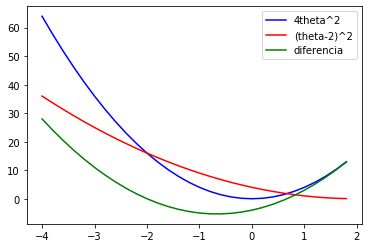

In [8]:
t = np.arange(-4.,2., 0.2)
plt.plot(t, 4*t**2, 'b', label='4theta^2')
plt.plot(t, (t-2)**2, 'r', label='(theta-2)^2')
plt.plot(t, 4*t**2-(t-2)**2, 'g', label = 'diferencia')
plt.legend(loc = 'upper right')
plt.show()


Luego, como P(error) resulta decreciente en el intervalo $(-2,2/3)$ y creciente en otro caso, entonces P(error) tiene un 
- mínimo en $\theta = 2/3$
- máximo en $\theta = -2$.

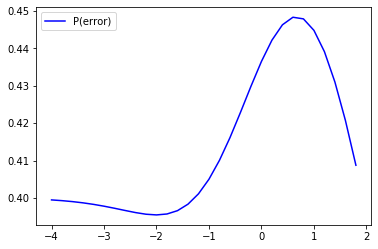

Error mínimo =  0.3954499736103642
Error máximo =  0.4485044774718463


In [9]:
Pomega1 = 0.2
Pomega2 = 0.4
mu1 = 0
mu2 = 2
sigma1 = 1.
sigma2 = 2
def Perror(t):
    return Pomega1*norm.cdf(t, mu1, sigma1 )+ Pomega2 * (1- norm.cdf(t, mu2,sigma2))
    
t = np.arange(-4.,2., 0.2)
plt.plot(t, Perror(t), 'b', label='P(error)')
plt.legend(loc = 'upper left')    
plt.show()
print('Error mínimo = ', Perror(-2.))
print('Error máximo = ',Perror(2/3))

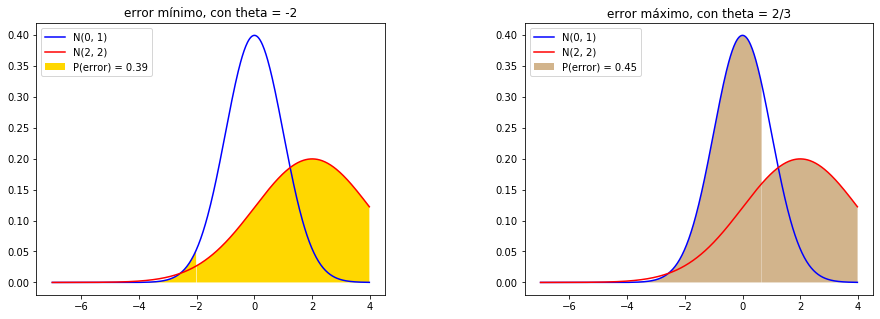

In [10]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.2, wspace=0.4)

plt.subplot(1,2, 1)
t = np.arange(-7.0, 4., 0.02)
x = np.arange(-7.0, -2., 0.02)
s = np.arange(-2., 4., 0.02)
y1 = norm.pdf(t, mu1, sigma1)
f1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(t, mu2, sigma2)
f2 = norm.pdf(s, mu2, sigma2)


plt.plot(t,y1, 'b', label = 'N(0, 1)')
plt.fill_between( x,0,f1, facecolor = 'gold')
plt.plot(t,y2, 'r', label = 'N(2, 2)')
plt.fill_between(s, 0,f2, facecolor = 'gold', label = 'P(error) = 0.39')
plt.title('error mínimo, con theta = -2')
plt.legend(loc = 'upper left')

plt.subplot(1,2, 2)
x = np.arange(-7.0, 2/3., 0.02)
s = np.arange(2/3, 4., 0.02)
f1 = norm.pdf(x, mu1, sigma1)
f2 = norm.pdf(s, mu2, sigma2)

plt.plot(t,y1, 'b', label = 'N(0, 1)')
plt.fill_between( x,0,f1,facecolor = 'tan')
plt.plot(t,y2, 'r',  label = 'N(2, 2)')
plt.fill_between(s, 0,f2, facecolor = 'tan', label = 'P(error) = 0.45')
plt.title('error máximo, con theta = 2/3')
plt.legend(loc = 'upper left')

plt.show()

# Ejercicio 6. 

Supongamos que se sustituye la funcion de decision deterministica $\alpha(x)$ por la regla aleatoria dada por la probabilidad $P(\alpha_i|x)$ de tomar la decisión $\alpha_i$ dado que se observo $x$.

* (a) Mostrar que el riesgo resultante viene dado por
 $$R=\displaystyle\int\left[\displaystyle\sum_{i=1}^aR(\alpha_i|x)P(\alpha_i|x)\right]p(x)dx$$
 
* (b) Ademas, demostrar que $R$ se minimiza para $P(\alpha_i|x)=1$ para la accion $\alpha_i$ asociada con el riesgo condicional minimo $R(\alpha_i|x)$, lo que demuestra que no obtenemos ningun beneficio haciendo aleatoria la regla de decision.

* (c) ¿Podemos beneficiarnos aleatorizando una regla suboptima? Explicar.



# *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

(a) Si el riesgo fuera determinístico, para cada $x$ se cumple $\alpha(x)=\alpha_i$ para algún $i=1\dots a$. En este caso se considera un riesgo aleatorio, es decir:
$$\alpha(x) = \alpha_i,\quad \mbox{con probabilidad }P(\alpha_i|x), \quad i=1\dots a.$$

Luego el riesgo esperado de $\alpha$ dado $x$ es la suma ponderada de sus posibles valores:
$$R(\alpha(x)|x) = \sum_{i=1}^a R(\alpha_i|x)P(\alpha_i|x).$$
Integrando sobre los valores de $x$ tenemos:
$$R = \int R(\alpha(x)|x)p(x)\,dx = \int \sum_{i=1}^a R(\alpha_i|x)P(\alpha_i|x) \,p(x)\,dx.$$



(b) Para minimizar $R$ debemos minimizar $R(\alpha(x)|x)$. Notemos que si
$$R(\alpha_j | x) = \min_{1\le i \le a}R(\alpha_i|x)$$ entonces 
$$\sum_{i=1}^a R(\alpha_i|x)P(\alpha_i|x) \ge \sum_{i=1}^a R(\alpha_j|x)P(\alpha_i|x) = R(\alpha_j|x),$$ pues  $\sum_iP(\alpha_i|x)=1$.


En particular, eligiendo $P(\alpha_j|x) = 1$ se minimiza el riesgo, pero esto le quita la aleatoriedad a la regla.


<br>
<br>